<a href="https://colab.research.google.com/github/robbieheriot/Bike-Share-Data-Wrangling/blob/main/Coursework1_40400628.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Coursework 1**
Data Wrangling <br>
Robbie Heriot / 40400628 <br>


## Introduce the Dataset
**For this project I will complete a series of tasks using the Bike Sharing dataset which contains informoation regarding the daily count of rental bikes between the years 2011 and 2012 in the Capital bike share system with the corresponding weather and seasonal information.**

In [37]:
#Install matplot to help visualize the data
!pip install matplotlib==3.2.2

In [38]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')
pd.set_option('float_format', '{:.1f}'.format)

#visuize t
path = "/content/day.csv"
df = pd.read_csv(path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.3,0.4,0.8,0.2,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.4,0.4,0.7,0.2,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.2,0.2,0.4,0.2,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.2,0.2,0.6,0.2,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.2,0.2,0.4,0.2,82,1518,1600


## Task 1.1
**Create DataFrames that consist of the following information: 1) Average counts (daily
counts) for 2011 and 2012 across days per month**

*I first renamed and re-ordered the months to be more understandable/readable. Then I used the mean() function to calculate the average daily count and grouped them by month. These results show that the mean average daily count per month.*

In [39]:
#re-label months to there names
df['monthname'] = df['mnth'].replace({1:'January',
                                       2:'February',
                                       3:'March',
                                       4:'April',
                                       5:'May',
                                       6:'June',
                                       7:'July',
                                       8:'August',
                                       9: 'September',
                                       10: 'October',
                                       11: 'November',
                                       12: 'December'})

#re-oerder months to correct order (not alphabetically)
monthorder = ['January','February', 'March', 'April', 'May','June', 'July', 'August', 'September','October', 'November','December']

#calculate average count grouped by month
averagedaily=df.groupby('monthname')[['cnt']].mean()

#put datafame in order
averagedaily = averagedaily.reindex(monthorder)

#show results
averagedaily

,cnt
monthname,
January,2176.3
February,2655.3
March,3692.3
April,4484.9
May,5349.8
June,5772.4
July,5563.7
August,5664.4
September,5766.5


## Task 1.2
**Create DataFrames that consist of the following information:  2) average counts (monthly counts)
for 2011 and 2012 across months per season.**

*I used the sum() function to get the total count for each month then calculated the monthly average grouped by season. The results show the average monthly count per season.*

In [40]:
#re-label seasons to there names
df['seasonname'] = df['season'].replace({1:'Winter',
                                         2:'Spring',
                                         3:'Summer',
                                         4:'Autumn'})

#re-oerder seasons to correct order (not alphabetically)
seasonorder = ['Winter','Spring', 'Summer', 'Autumn']

#calculate total monthly counts
totalmonthcounts = df.groupby(['seasonname','monthname'])[['cnt']].sum()

#calculalte average monthly counts and grouped by season
averageseasoncounts = totalmonthcounts.groupby(['seasonname'])[['cnt']].mean()

#put datafame in order
averageseasoncounts = averageseasoncounts.reindex(seasonorder)

#Show resuts
averageseasoncounts

,cnt
seasonname,
Winter,117837.0
Spring,229647.2
Summer,265282.2
Autumn,210403.2


#Task 2
**Create a DataFrame that shows the difference between the average counts of each month in 2011 and 2012**

*I calculated the average monthly data and group by year and month then turned the data back into a data frame using the resetindex() function. I then created separate columns for 2011 and 2012 using the .pivot() function. The results show that counts increased over every month in 2012 compared to 2011.*

In [41]:
#re-label years to there names
df['yearname'] = df['yr'].replace({0:'2011', 1:'2012'})

#calulate the average monthly data and group by year and month
monthcounts = df.groupby(['yearname', 'monthname'])[['cnt']].mean().reset_index()

#create separte collums for 2011 and 2012
monthcounts = monthcounts.pivot(index='monthname', columns='yearname', values='cnt')

#put months in order
monthcounts = monthcounts.reindex(monthorder)

#show results
monthcounts


yearname,2011,2012
monthname,,
January,1231.9,3120.8
February,1722.0,3556.4
March,2066.0,5318.5
April,3162.3,5807.5
May,4381.3,6318.2
June,4783.7,6761.0
July,4559.4,6568.0
August,4409.4,6919.5
September,4247.3,7285.8


*I also took the results from 2011 away from 2012 to show how big of a margin the count has increased by for each month.*

In [42]:
#calculate average monthly counts for 2011 and 2012
df2011 = df[df['yr'] == 0].groupby('monthname').mean()[['cnt']]
df2012 = df[df['yr'] == 1].groupby('monthname').mean()[['cnt']]


#calculate difference between months
difference = df2012-df2011

#put datafame in order
difference = difference.reindex(monthorder)

#show results
difference

,cnt
monthname,
January,1888.9
February,1834.5
March,3252.6
April,2645.1
May,1936.9
June,1977.3
July,2008.6
August,2510.1
September,3038.5


#Task 3
**For every year, find which season had the highest count of total rental bikes, with casual
and registered users separately.**


*I started by using pandas to calculate the average counts for both casual & registered for 2011 grouped by season, then done the same for 2012. I then used the idmax() function to select the highest value and from the data frame and display said season.*

In [43]:
#calculate highest average counts for both casual & registered for 2011 grouped by season
cas2011=df[df['yr'] == 0].groupby('seasonname').mean()['casual'].idxmax()
reg2011=df[df['yr'] == 0].groupby('seasonname').mean()['registered'].idxmax()

#calculate highest average counts for both casual & registered for 2012 grouped by season
cas2012=df[df['yr'] == 1].groupby('seasonname').mean()['casual'].idxmax()
reg2012=df[df['yr'] == 1].groupby('seasonname').mean()['registered'].idxmax()

#create and show results
print("The season with the most casual riders in 2011 was", cas2011)
print("The season with the most registered riders in 2011 was", reg2011)
print("The season with the most casual riders in 2012 was", cas2012)
print("The season with the most registered riders in 2012 was", reg2012)

The season with the most casual riders in 2011 was Summer
The season with the most registered riders in 2011 was Summer
The season with the most casual riders in 2012 was Summer
The season with the most registered riders in 2012 was Summer


#Task 4
**For every year, find the top 3 months with the lowest number of count of total rental bikes
with casual and registered users separately.**

*I calculated the average counts for both casual & registered for 2011 grouped by month, then done the same for 2012. I then used the idmin() function to select the lowest value and from the data frame and display said month.*

In [44]:
#calculate lowest average counts for both casual & registered for 2011 grouped by month
cas2011=df[df['yr'] == 0].groupby('monthname').mean()['casual'].idxmin()
reg2011=df[df['yr'] == 0].groupby('monthname').mean()['registered'].idxmin()


#calculate lowest average counts for both casual & registered for 2012 grouped by month
cas2012=df[df['yr'] == 1].groupby('monthname').mean()['casual'].idxmin()
reg2012=df[df['yr'] == 1].groupby('monthname').mean()['registered'].idxmin()

#create and show results
print("The month with the least casual riders in 2011 was", cas2011)
print("The month with the least registered riders in 2011 was", reg2011)
print("The month with the least casual riders in 2012 was", cas2012)
print("The month with the least registered riders in 2012 was", reg2012)

The month with the least casual riders in 2011 was January
The month with the least registered riders in 2011 was January
The month with the least casual riders in 2012 was January
The month with the least registered riders in 2012 was January


#Task 5.d
**Plotting the distribution of rental bike counts for 2011 and 2012 separately: d. Yearly-wise distribution of counts.**

*I calculated the average monthly count for 2011 and 2012 separately then used Matplotlib to create a bar chart to plot the data using the plt.bar() function. The results show the rise in counts during the summer months and how much the average count increased in 2012.*

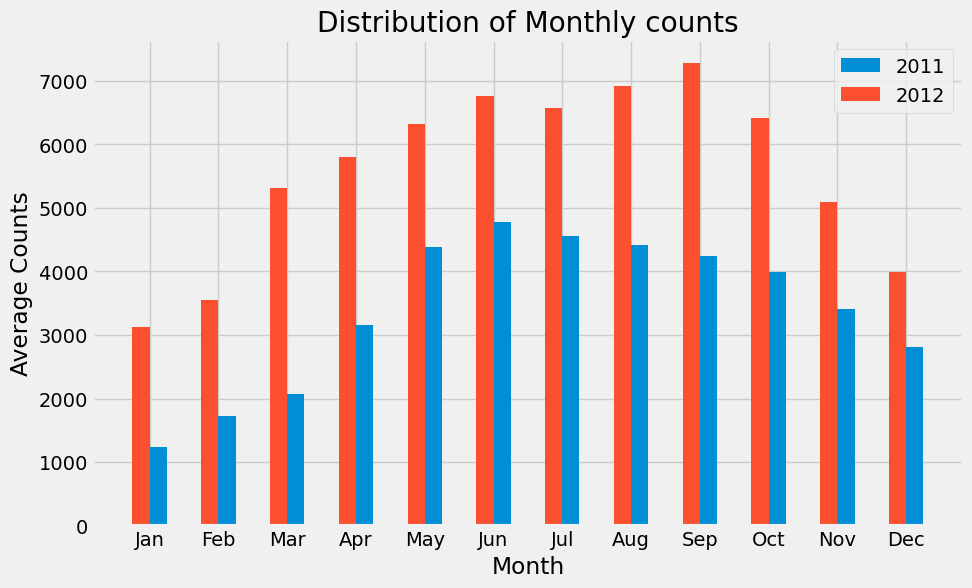

In [45]:
#create chart
xaxis = np.arange(1, 13)
width = 0.25
monthlabels = ['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
fig, bchart = plt.subplots(figsize=(10, 6))

#calculate average monthly counts for each year
y1 = df[df.yr == 0].groupby('mnth')['cnt'].mean()
y2 = df[df.yr == 1].groupby('mnth')['cnt'].mean()

#add data to graph
plt.bar(xaxis + width/2, y1, width, label='2011')
plt.bar(xaxis - width/2, y2, width, label='2012')

#add labels
plt.xticks(xaxis)
bchart.set_xticklabels(monthlabels)
plt.xlabel('Month')
plt.ylabel('Average Counts')
plt.title('Distribution of Monthly counts')

#add legend
plt.legend()

#show results
plt.show()

#Task 5.e
**Plotting the distribution of rental bike counts for 2011 and 2012 separately: e. Working Day-wise distribution of counts.**


*I calculated the average weekday count for working days in 2011 and 2012 separately then used Matplotlib to create a bar chart to plot the data using the plt.bar() function. The results show the rise in counts show how much average counts increased in 2012 compared to 2011.*

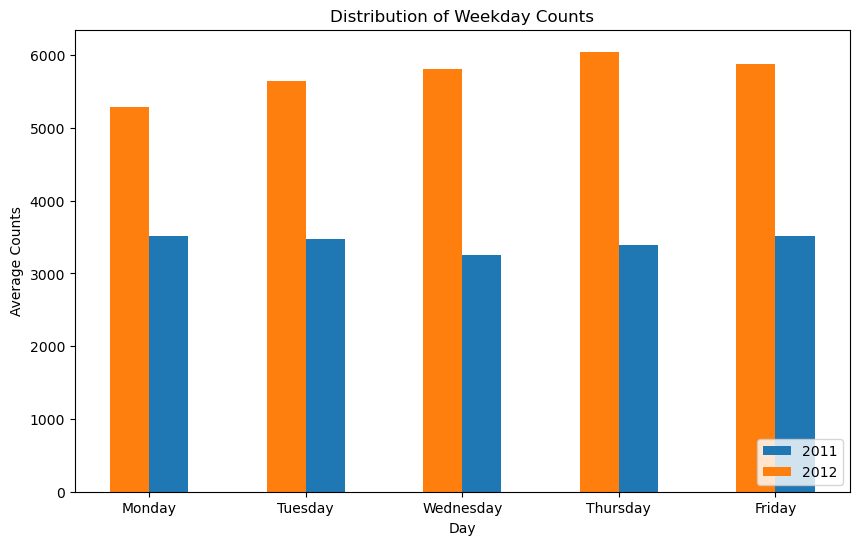

In [15]:
#create chart
xaxis2 = np.arange(1, 6)
width = 0.25
weeklabels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
fig, bchart2 = plt.subplots(figsize=(10, 6))

#separte years
yr2011 = df[df.yr == 0]
yr2012 = df[df.yr == 1]

# calculate average counts on working days for each years
workingday2011= yr2011[yr2011.workingday==1].groupby('weekday')['cnt'].mean()
workingday2012= yr2012[yr2012.workingday==1].groupby('weekday')['cnt'].mean()

#add data to graph
plt.bar(xaxis2 + width/2, workingday2011, width, label='2011')
plt.bar(xaxis2 - width/2, workingday2012, width, label='2012')


#labels
plt.xticks(xaxis2)
bchart2.set_xticklabels(weeklabels)
plt.xlabel('Day')
plt.ylabel('Average Counts')
plt.title('Distribution of Weekday Counts')

#add legend
plt.legend(loc=4)

#show results
plt.show()

#Task 6
 **Plotting the Correlation between hourly/daily bike rental count and environmental
settings, including weather, temperature, humidity and windspeed**

*I used Matplotlib to create a scatter plot where the x axis is windspeed, colour is temperature and size is humidity. The results show a strong correlation between temperature and count, being the higher the temperature the higher the count and a slightly weaker reverse correlation between windspeed and count. With little to no correlation with humidity.*

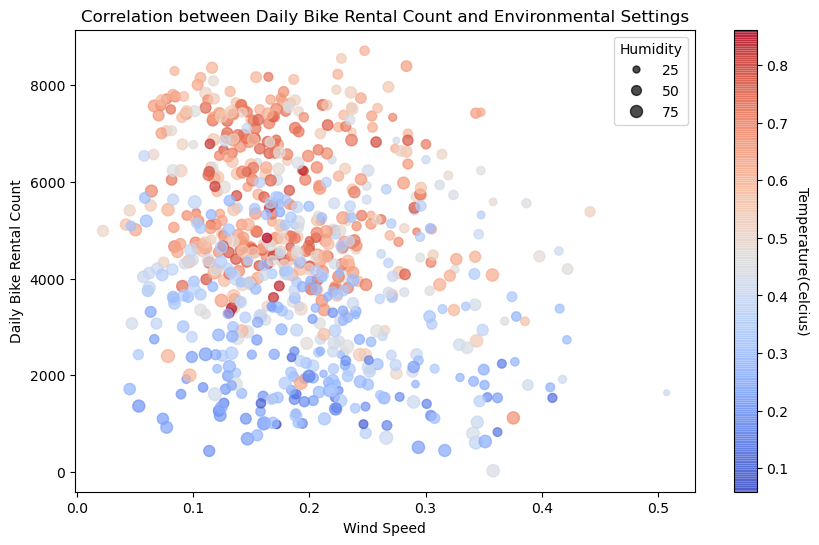

In [16]:
#create the scatter graph where x axis is windspeed, colour is temperature and size is humidity
weather=plt.figure(figsize=(10, 6))
weather=plt.scatter(df['windspeed'], df['cnt'], c=df['temp'], cmap='coolwarm', s=df['hum']*90, alpha=0.70)

#create colour bar for temperature
cbar= plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Temperature(Celcius)', rotation=270)

#create legend for humidity
plt.legend(*weather.legend_elements("sizes",num=4), loc=1, title="Humidity")

#labels
plt.xlabel('Wind Speed')
plt.ylabel('Daily Bike Rental Count')
plt.title('Correlation between Daily Bike Rental Count and Environmental Settings')

#show results
plt.show(weather)

*I also used seaborn to create a bar chart to represent the weather situation which shows a correlation between the three weather situations and daily counts. With people preferring to go out on clearer days.*

Text(0.5, 1.0, 'Correlation between Daily Bike Rental Count and Weather Situation')

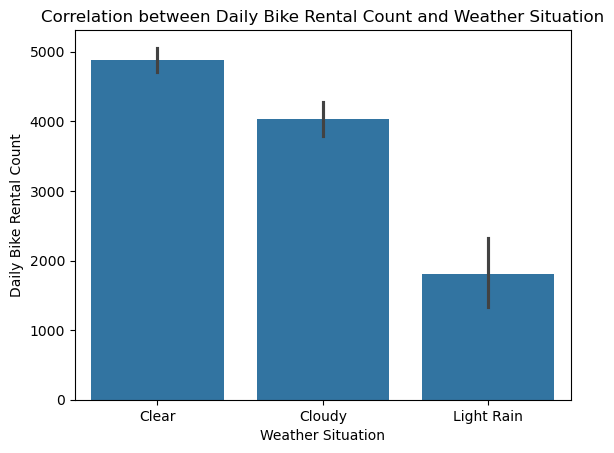

In [17]:
hi=sns.barplot(x=df['weathersit'],y=df['cnt'])

hi.set_xticklabels(['Clear','Cloudy','Light Rain'])

plt.xlabel('Weather Situation')
plt.ylabel('Daily Bike Rental Count')
plt.title('Correlation between Daily Bike Rental Count and Weather Situation')

#Task 7
**Prediction of bike rental count daily based on the environmental and seasonal
settings.**


*I used SKlearn to train and test the data then create trendlines on scatter plots for each environmental setting.*

*The previous results are confirmed by the results showing a strong trend line in the temperature graph, a slighter weaker for windspeed and no correlation for humidity.*

*I used the predict() function to create predictions of the daily count based on the value of each environmental setting.*

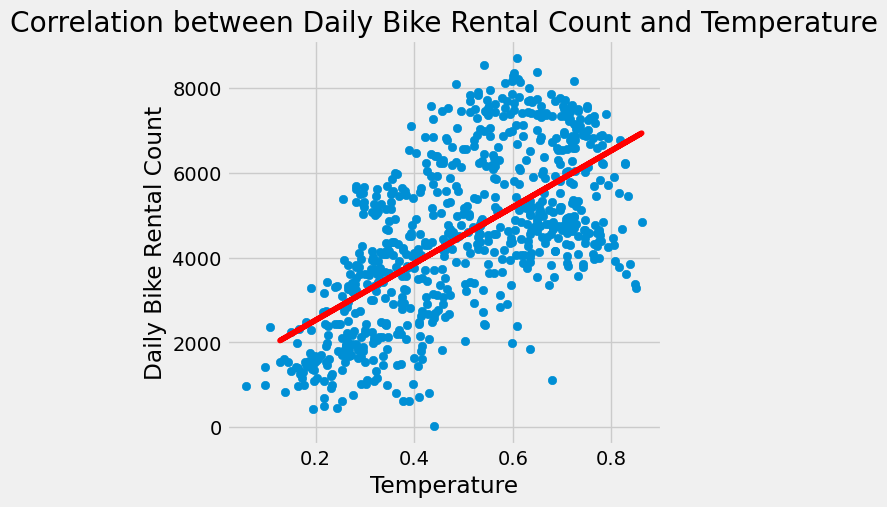

At a Temperature of 0.6 the expected count is 5194.343004451532


In [18]:
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

plt.figure(figsize=(5, 5))

C_train,C_test,t_train,t_test=train_test_split(df.temp,df.cnt)

lr=LinearRegression()

lr.fit(C_train.values.reshape(-1,1), t_train.values)

predtemp=lr.predict(C_test.values.reshape(-1,1))

plt.plot(C_test,predtemp, color='r')
plt.scatter(df['temp'], df['cnt'])

plt.xlabel('Temperature')
plt.ylabel('Daily Bike Rental Count')
plt.title('Correlation between Daily Bike Rental Count and Temperature')

plt.show()

TemperatureValue = 0.6

TemperaturePrediction = lr.predict(np.array([[TemperatureValue]]))[0]

print("At a Temperature of",TemperatureValue,"the expected count is",TemperaturePrediction)

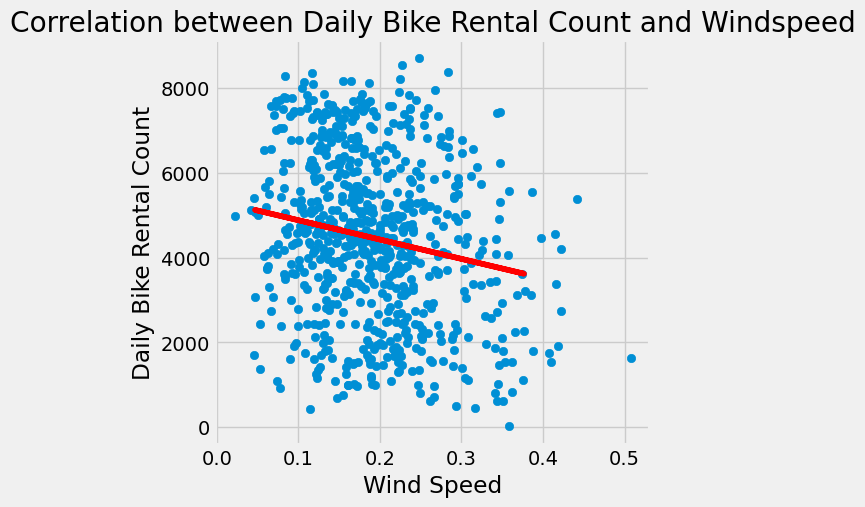

At a Windspeed of 0.1 the expected count is 4884.16503441739


In [19]:
plt.figure(figsize=(5, 5))

X_train,X_test,y_train,y_test=train_test_split(df.windspeed,df.cnt)

lr=LinearRegression()
lr.fit(X_train.values.reshape(-1,1), y_train.values)

predws=lr.predict(X_test.values.reshape(-1,1))

plt.plot(X_test,predws, color='r')
plt.scatter(df['windspeed'], df['cnt'])

plt.xlabel('Wind Speed')
plt.ylabel('Daily Bike Rental Count')
plt.title('Correlation between Daily Bike Rental Count and Windspeed')

plt.show()

windspeedValue = 0.1

windspeedPrediction = lr.predict(np.array([[windspeedValue]]))[0]

print("At a Windspeed of",windspeedValue,"the expected count is",windspeedPrediction)


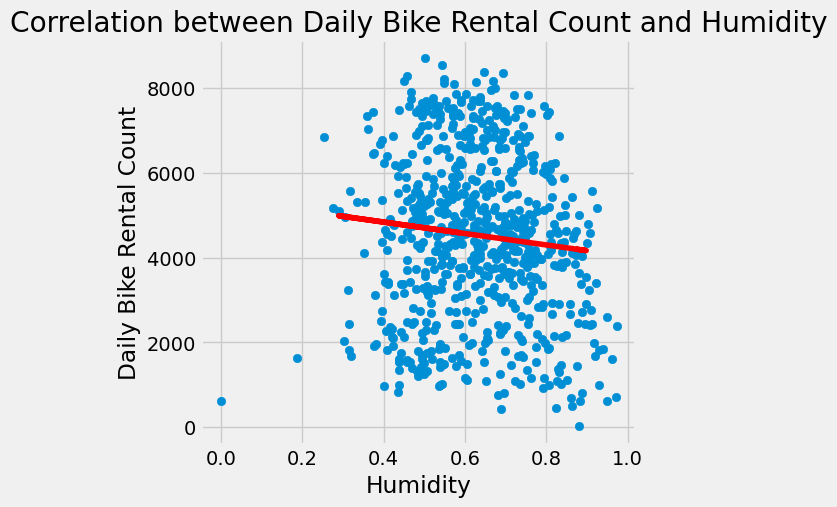

At a Humidity of 0.4 the expected count is 4570.17176396364


In [20]:
plt.figure(figsize=(5, 5))

S_train,S_test,h_train,h_test=train_test_split(df.hum,df.cnt)

lr=LinearRegression()
lr.fit(S_train.values.reshape(-1,1), h_train.values)

predhum=lr.predict(S_test.values.reshape(-1,1))

plt.plot(S_test,predhum, color='r')
plt.scatter(df['hum'], df['cnt'])

plt.xlabel('Humidity')
plt.ylabel('Daily Bike Rental Count')
plt.title('Correlation between Daily Bike Rental Count and Humidity')

plt.show()

HumidityValue = 0.4

HumidityPrediction = lr.predict(np.array([[TemperatureValue]]))[0]

print("At a Humidity of",HumidityValue,"the expected count is",HumidityPrediction)